In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats
from os.path import join
from pprint import pprint

%matplotlib inline

In [2]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [3]:
import reverse_geocoder as rg

In [4]:
d_path = "./data"
filename = "taxi-trips.csv"

df = pd.read_csv(join(d_path, filename))

In [5]:
d_path = "./data"
filename = "rg_cities1000.csv"

ds = pd.read_csv(join(d_path, filename))

# Data Exploration

#### Overview of Data

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [ ]:
#This prints the overview of the taxi trips and their attributes. It can be seen the first five lines.

#### Descriptive Statistics

In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [48]:
#This descriptive stastistics about taxi trips, basically shows the mean,standard deviation and other descriptive statistics.
#It can be shown that the standart deviation of trip duration is higher than the other ones.
#Small standard deviations mean that most of your data is clustered around the mean.
#The higher standart deviation of trip_duration shows that the data's spread, how widely it is distributed about the mean.
#It can be shown that trip_duration spread more than others.

#### Data Types

In [8]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
#It can be seen that the data types of the columns are different than each other
#Id, pickup_datetime, dropoff_datetime and store_and_fwd_flag are objects
#Vendor_id, passenger_count, trip_durations are integers
#Other columns related to longtitude and latitute are float values.

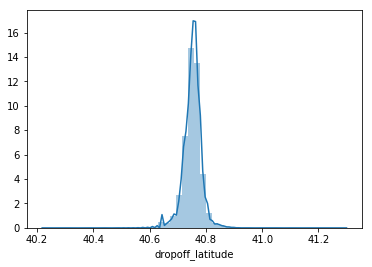

In [80]:
sns.distplot(df["dropoff_latitude"], norm_hist=True)  # points

[]

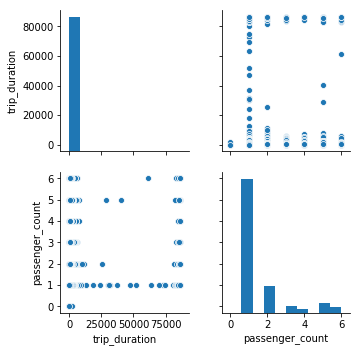

In [85]:
trippessenger = ["trip_duration", "passenger_count"]

sns.pairplot(data=df, vars=trippessenger)
plt.plot()

In [ ]:
#This graphs shows how trip duration distributed over passenger count
#It can be shown that if passenger count is less than or equal to 1, trip duration is tend to be higher.

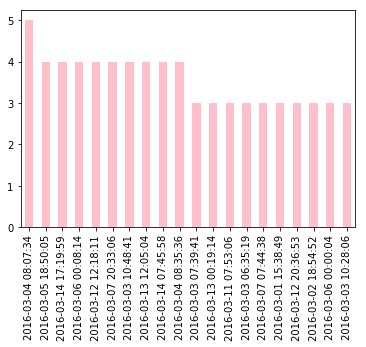

In [87]:
df["pickup_datetime"].value_counts()[:20].plot(kind="bar",color = "pink",rot= 90)

In [ ]:
#People usually preferred the first date time which is at 08:07 and others l

#### Data Shape

In [9]:
n_rows, n_columns = df.shape  # get the shape of dataframe
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 118185, number of columns: 11


In [10]:
ds.head()

,lat,lon,name,admin1,admin2,cc
0,42.57952,1.65362,El Tarter,Canillo,NaN,AD
1,42.46372,1.49129,Sant Julia de Loria,Sant Julia de Loria,NaN,AD
2,42.54277,1.73361,Pas de la Casa,Encamp,NaN,AD
3,42.55623,1.53319,Ordino,Ordino,NaN,AD
4,42.50729,1.53414,les Escaldes,Escaldes-Engordany,NaN,AD


In [88]:
#This table is the representation ofs rg_cities10000.csv file and its cities location. It has columns as 
#Iat,Ion,name,admin1,admin2 and cc.

In [11]:
import reverse_geocoder as rg

In [12]:
import csv
input_filename = '/Users/lollipoptart/Desktop/Untitled Folder/data/taxi-trips.csv'

pickup_cities = [(row[6],row[5]) for row in csv.reader(open(input_filename,'rt'),delimiter=',')]
pp.pprint(pickup_cities[1:5])

[   ('40.76793670654297', '-73.98215484619139'),
    ('40.74433898925781', '-73.98104858398438'),
    ('40.750526428222656', '-73.99456024169923'),
    ('40.758766174316406', '-73.97509002685547')]


In [13]:
pickup_district = rg.search(pickup_cities[1:])

Loading formatted geocoded file...


In [14]:
x = pd.DataFrame(pickup_district)

In [15]:
df['pickup_district'] = x['name']

In [16]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City


In [ ]:
#New column as a pickup_district is added by processing the geocode and matched the coordinates with cities.

In [17]:
dropoff_district = [(row[8],row[7]) for row in csv.reader(open(input_filename,'rt'),delimiter=',')]
pp.pprint(dropoff_district[1:5])

[   ('40.765602111816406', '-73.96463012695312'),
    ('40.78998947143555', '-73.9729995727539'),
    ('40.7561912536621', '-73.97850036621094'),
    ('40.76506805419922', '-73.95320129394531')]


In [ ]:
#By doing this, the coordinates are extracted from the file and matched with the cities with geocoding.

In [18]:
dropoff_district = rg.search(dropoff_district[1:])

In [90]:
#New column is added

In [19]:
y = pd.DataFrame(dropoff_district)

In [20]:
df['dropoff_district'] = y['name']

In [21]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


In [ ]:
#New column dropoff district is added with the same process of pickup_district

#### Pickup District

##### For pickup district this is the top 5 cities 

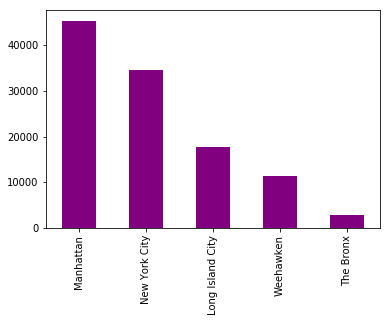

In [107]:
top5pickup = df["pickup_district"].value_counts()[:5].plot(kind="bar", color="purple",rot=90)
top5pickupprint = df["pickup_district"].value_counts()[:5]


In [105]:
print(top5pickupprint)

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


In [97]:
top5pickup.plot(kind="barh", title = "Top 5 Drop off District")

[]

#### Dropoff District

##### For dropoff district this is the top 5 cities

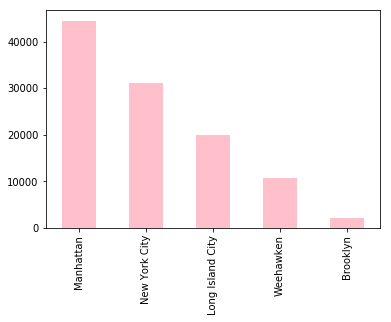

In [106]:
top5distrincts = df["dropoff_district"].value_counts()[:5].plot(kind="bar", color="pink",rot=90)
top5distrinctsprint = df["dropoff_district"].value_counts()[:5]

In [102]:
print(top5distrinctsprint)

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


## Measuring Distance

In [26]:
from geopy.distance import geodesic

In [27]:
import csv
input_filenamex= '/Users/lollipoptart/Desktop/Untitled Folder/data/taxi-trips.csv'
pickup_citiescor = [(row[6],row[5]) for row in csv.reader(open(input_filenamex,'rt'),delimiter=',')]
dropoff_districtcor = [(row[8],row[7]) for row in csv.reader(open(input_filenamex,'rt'),delimiter=',')]

In [28]:
distance = []
for i in range(1,len(pickup_citiescor)):
    distance.append(geodesic(pickup_citiescor[i],dropoff_districtcor[i]).miles)

In [ ]:
#I take the distance between all pickup districts and all droppoff districts with for loop and
#append them into a list I called distance in order to add this list as a new column in the main table.

In [29]:
z = pd.DataFrame(distance)
df['distance'] = z

In [30]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103


In [ ]:
#New column is added as a distance

In [112]:
z

,0
0,0.933406
1,3.178194
2,0.928961
3,1.228003
4,1.562103
5,2.486098
6,2.648687
7,0.452659
8,1.372636
9,1.809375


### Date Aggregation

In [31]:
timeofDay = []
times = [(row[2]) for row in csv.reader(open(input_filenamex,'rt'))]

for i in range(1,len(times)):
    strTime = times[i]
    intTime = int(strTime[11:13])
    if(intTime < 9 and intTime >= 7):
        timeofDay.append("rush_hour_morning")
    elif(intTime < 16 and intTime >= 9):
        timeofDay.append("afternoon")
    elif(intTime >= 16 and intTime < 18):
        timeofDay.append("rush hour evening")
    elif(intTime >= 18 and intTime < 23):
        timeofDay.append("evening")
    elif(intTime >= 23 or intTime < 7):
        timeofDay.append("late night")
        
    

In [32]:
w = pd.DataFrame(timeofDay)
df['timeofDay'] = w

In [33]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,timeofDay
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush hour evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon


In [ ]:
#New column is added as a time of day

In [109]:
w

,0
0,rush hour evening
1,evening
2,rush_hour_morning
3,afternoon
4,afternoon
5,evening
6,evening
7,afternoon
8,evening
9,late night


## Avarage Distance vs. Time of Day Changes

timeofDay
afternoon            1.932456
evening              2.099076
late night           2.558580
rush hour evening    2.077128
rush_hour_morning    1.943823
Name: distance, dtype: float64


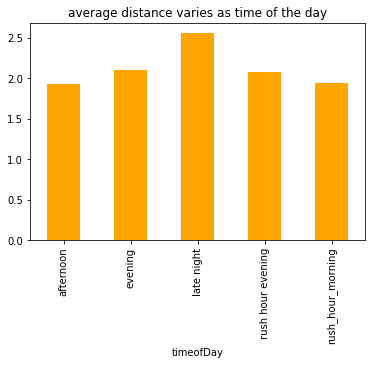

In [114]:
import seaborn as sns 
cols2plot = ["distance", "timeofDay"]


timeofDays = df.groupby(by="timeofDay").mean()["distance"]
print(timeofDays)
timeofDays.plot(kind="bar", title= "average distance varies as time of the day", color = "orange")




timeofDay
afternoon             963.922746
evening               893.595329
late night            866.095457
rush hour evening    1024.494552
rush_hour_morning     918.488716
Name: trip_duration, dtype: float64


Text(0.5, 1.0, 'Average Trip Duration Varies Change in a Day')

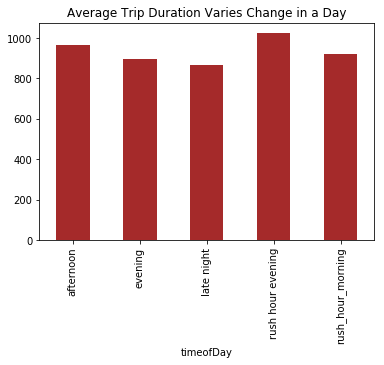

In [123]:
tripdur = df.groupby(by="timeofDay").mean()["trip_duration"]
print(tripdur)


tripdur.plot(kind="bar",color = "brown")
plt.title("Average Trip Duration Varies Change in a Day")


## Hypothesis Testing

#### Does passenger group size affect the distance?

passenger_count
1    176102.875118
2     37146.580726
3      9838.713510
4      4656.539575
5     13389.453205
6      8372.702339
Name: distance, dtype: float64


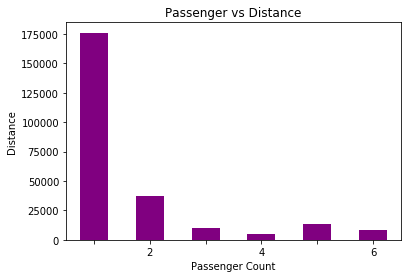

In [38]:
min_groupsize = df["passenger_count"].min()
max_groupsize = df["passenger_count"].max()

df_passenger = df[df["passenger_count"]>0]
passenger_group = df_passenger.groupby(by="passenger_count").sum()  
distance_group = passenger_group["distance"]
print(distance_group)

ax = distance_group.plot(kind="bar",
                   color="purple",
                   rot=0)

for tick in ax.xaxis.get_major_ticks()[::2]:  # just to make it more readable
    tick.label1.set_visible(False)            # hiding some xticks

plt.ylabel("Distance")
plt.xlabel("Passenger Count")
plt.title("Passenger vs Distance")
plt.show()

In [ ]:
#This graph shows that if passenger count is smaller than or equal to 1, distance travelled is higher than
#passenger count bigger than or equal to two 

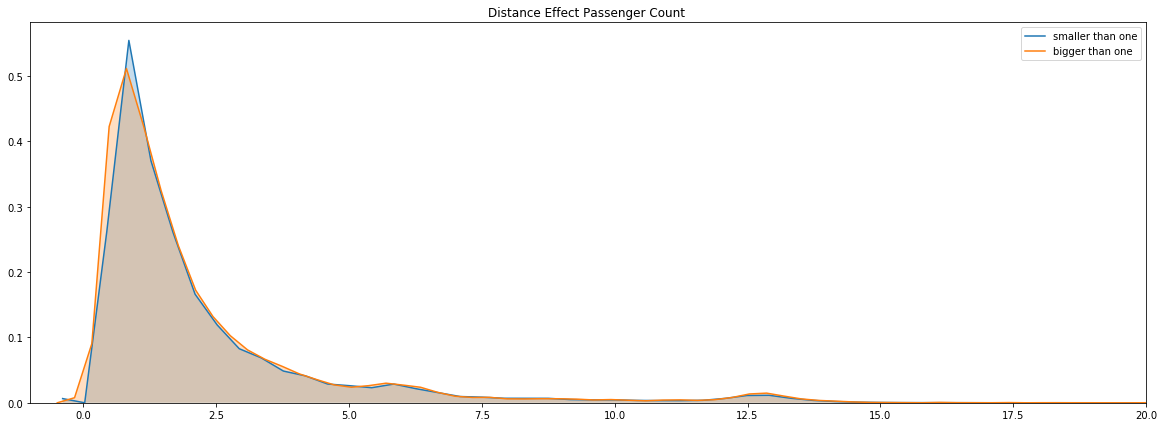

In [144]:
smallone = df[df["passenger_count"]==1]
biggerone = df[df["passenger_count"]>1]

fig,ax = plt.subplots(1,1,figsize = (20,7))
ax = sns.kdeplot(smallone["distance"].rename("smaller than one"), shade=True)
sns.kdeplot(biggerone["distance"].rename("bigger than one"), ax=ax, shade=True)
plt.title("Distance Effect Passenger Count ")


plt.xlim([-1, 20])
plt.show()

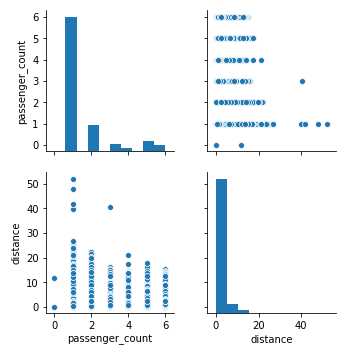

In [40]:
cols = ["passenger_count","distance"]
sns.pairplot(data = df, vars = cols)

In [41]:
smallvalues = smallone["distance"].values
bigvalues = biggerone["distance"].values

In [42]:
_, p_value = stats.ttest_ind(a=smallvalues, b=bigvalues, equal_var=False)
p_value

9.445117080443264e-07

In [127]:
smallvalues.mean()

2.0892499124239547

In [128]:
bigvalues.mean()

2.166012256322192

In [ ]:
#If we look at the t-test, it can be seen that p-value is smaller than 0.05 
#Small p-value indicates strong evidence against the null hypothesis, so we reject the null hypothesis.
#Our value is 9.445e-07 which is very smaller than 0.05.

In [ ]:
##This t-test is done in order to show the relationship between distance and passenger count.
#As a result it can be seen that there is no relation because null hypothesis is rejected.
#We can't say passenger group size affect distance.
#Also smallvalues' mean is 2.08 and the big values' mean is 2.16, there is no significant difference

#### Do trip distances increase in weekends?

In [ ]:
#String object(pickup datetime) is converted into a datetime and weekday 

In [45]:
import datetime
df["pickup_datetime"] = pd.to_datetime(df['pickup_datetime'])
df["pickup_datetime"].dt.weekday 

0         0
1         3
2         4
3         0
4         0
5         5
6         2
7         2
8         3
9         0
10        6
11        1
12        5
13        3
14        2
15        6
16        1
17        6
18        2
19        1
20        0
21        5
22        3
23        0
24        0
25        5
26        1
27        0
28        1
29        3
         ..
118155    3
118156    3
118157    0
118158    3
118159    5
118160    6
118161    6
118162    2
118163    3
118164    0
118165    6
118166    5
118167    5
118168    3
118169    4
118170    4
118171    3
118172    4
118173    5
118174    0
118175    4
118176    1
118177    5
118178    5
118179    6
118180    4
118181    6
118182    4
118183    1
118184    6
Name: pickup_datetime, Length: 118185, dtype: int64

In [ ]:
#Table shows the distributions.

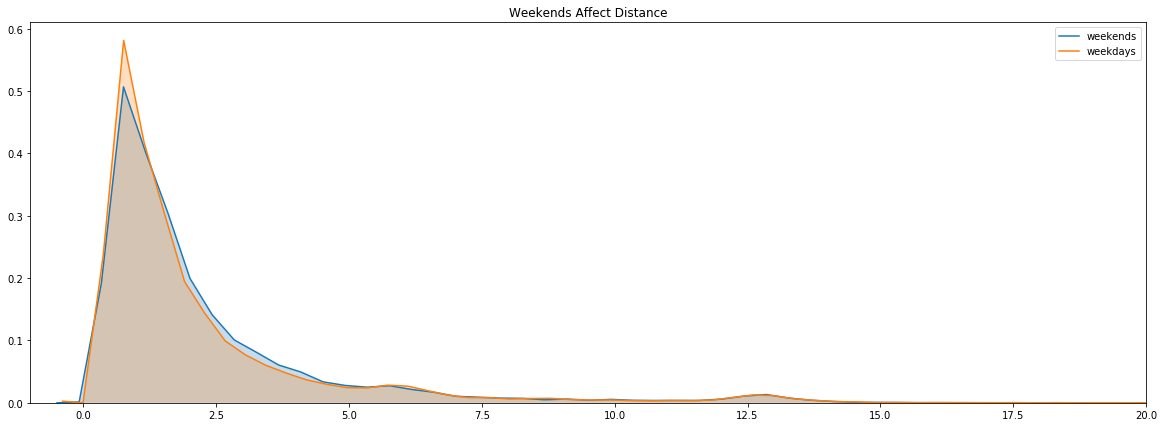

In [141]:
df_x = df["pickup_datetime"]


fig,ax = plt.subplots(1,1,figsize = (20,7))

weekends = df[df["pickup_datetime"].dt.weekday >= 5]
weekdays = df[df["pickup_datetime"].dt.weekday < 5]

ax = sns.kdeplot(weekends["distance"].rename("weekends"), shade=True)
sns.kdeplot(weekdays["distance"].rename("weekdays"), ax=ax, shade=True)
plt.title("Weekends Affect Distance")
plt.xlim([-1, 20])
plt.show()




In [134]:
weekendsvalues = weekends["distance"].values
weekdaysvalues = weekdays["distance"].values

_, p_value = stats.ttest_ind(a=weekendsvalues, b=weekdaysvalues, equal_var=False)
p_value

2.0924144330695257e-08

In [135]:
weekendsvalues.mean()

2.1719948859757507

In [136]:
weekdaysvalues.mean()

2.085996657618863

In [ ]:
##If we look at the t-test, it can be seen that p-value is smaller than 0.05 
#So we reject the null hypothesis.
#Our value is 2.0924e-08 which is very smaller than 0.05.
#Also difference between means are very close so there is no significant difference. 
#We cannot say that trip distance increase in weekends it will not be true.